<a href="https://colab.research.google.com/github/parisazeynaly/Space-X-Dataset/blob/main/Space_x_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import missingno as msno


# **EDA**

In [2]:
df=pd.read_csv('dataset_falcon9.csv')
# Basic structure
print("Shape of dataset:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe(include='all'))

Shape of dataset: (90, 18)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Cl

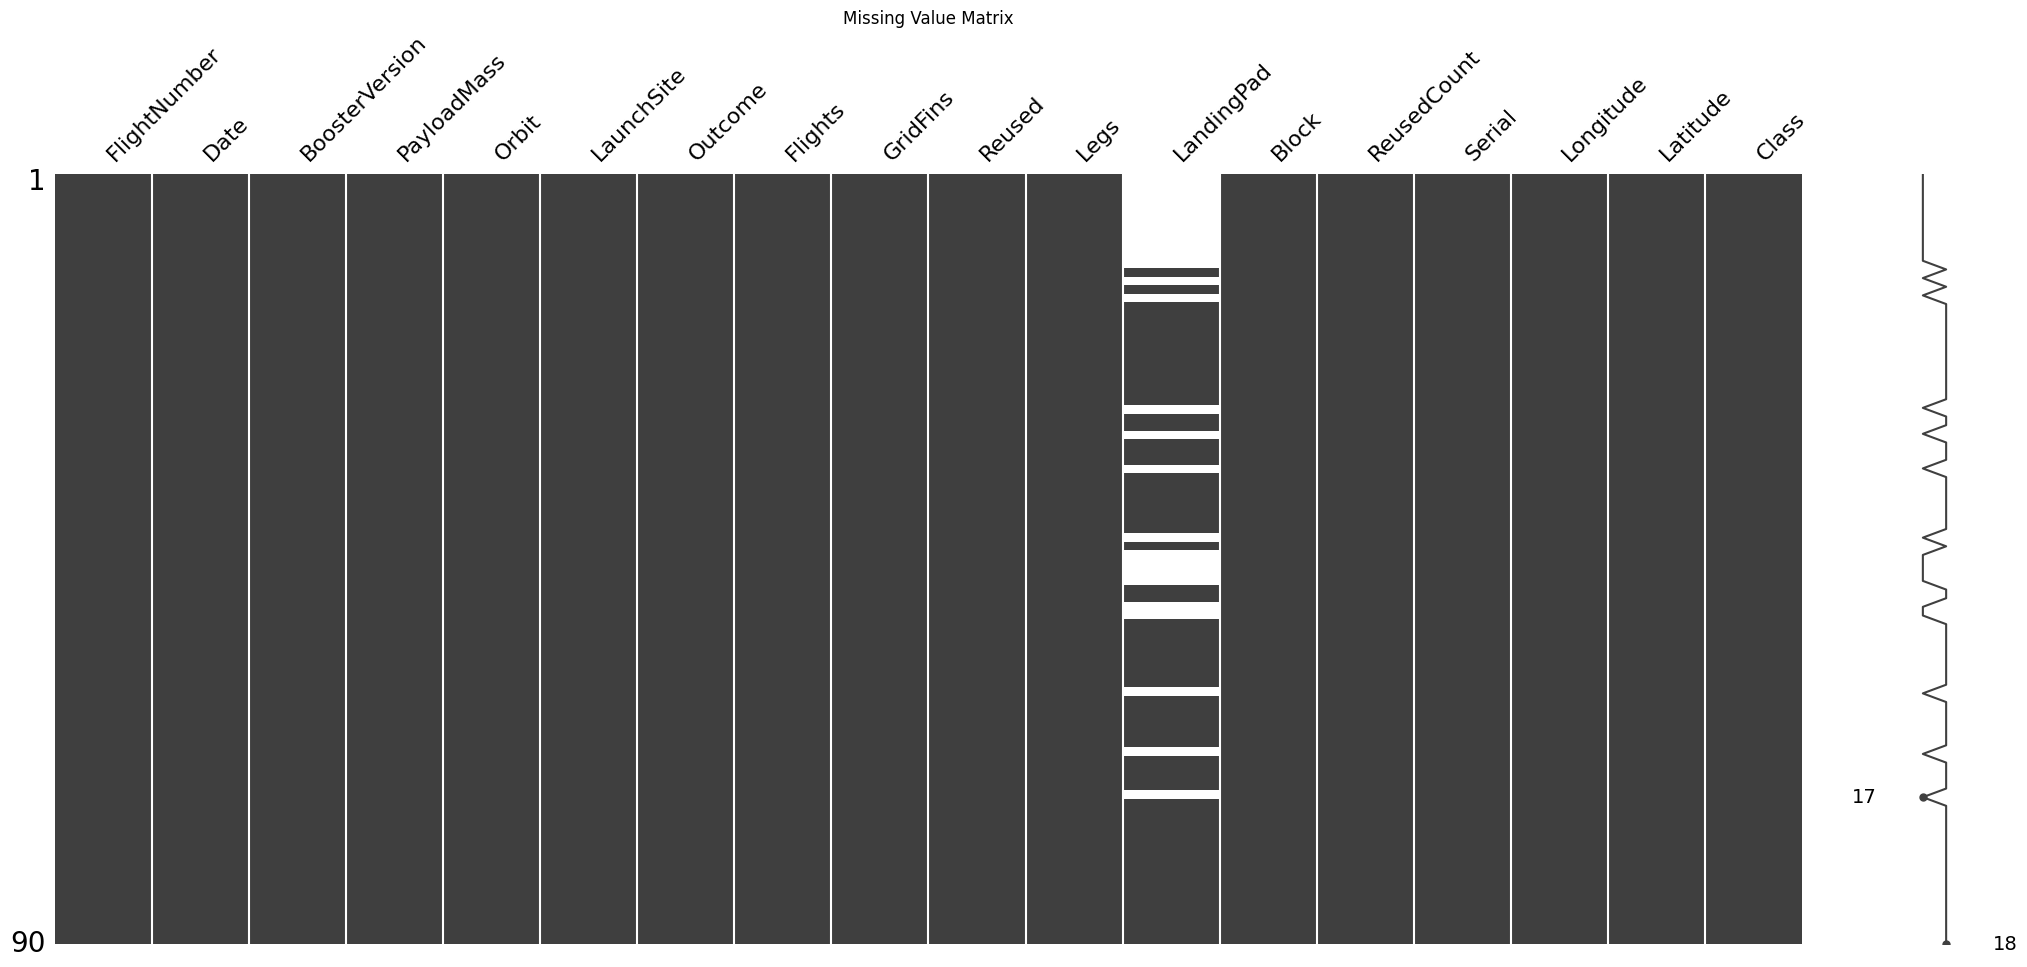

In [3]:
# Visualize missing data
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()


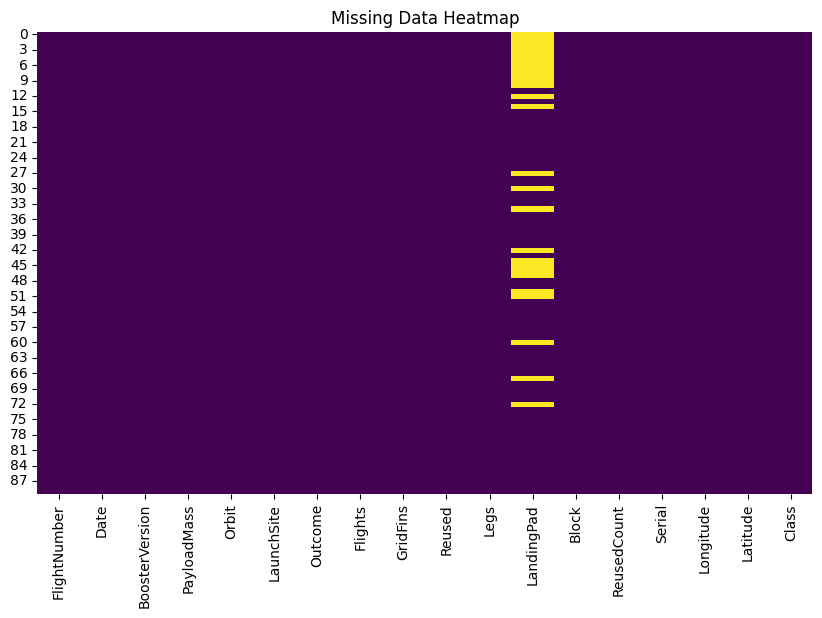

In [4]:
# Visualize missing data as heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [5]:
# Check unique values for categorical features
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Date
Date
2010-06-04    1
2012-05-22    1
2013-03-01    1
2013-09-29    1
2013-12-03    1
             ..
2020-09-03    1
2020-10-06    1
2020-10-18    1
2020-10-24    1
2020-11-05    1
Name: count, Length: 90, dtype: int64

Column: BoosterVersion
BoosterVersion
Falcon 9    90
Name: count, dtype: int64

Column: Orbit
Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

Column: LaunchSite
LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Column: Outcome
Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

Column: LandingPad
LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, 

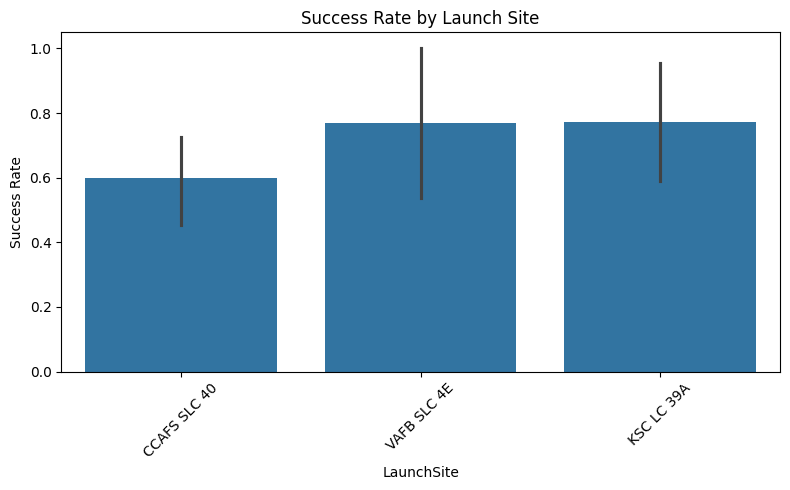

In [7]:
# Success Rate by Launch Site
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='LaunchSite', y='Class', estimator='mean')
plt.title("Success Rate by Launch Site")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# . Payload Mass vs Success (with hue)

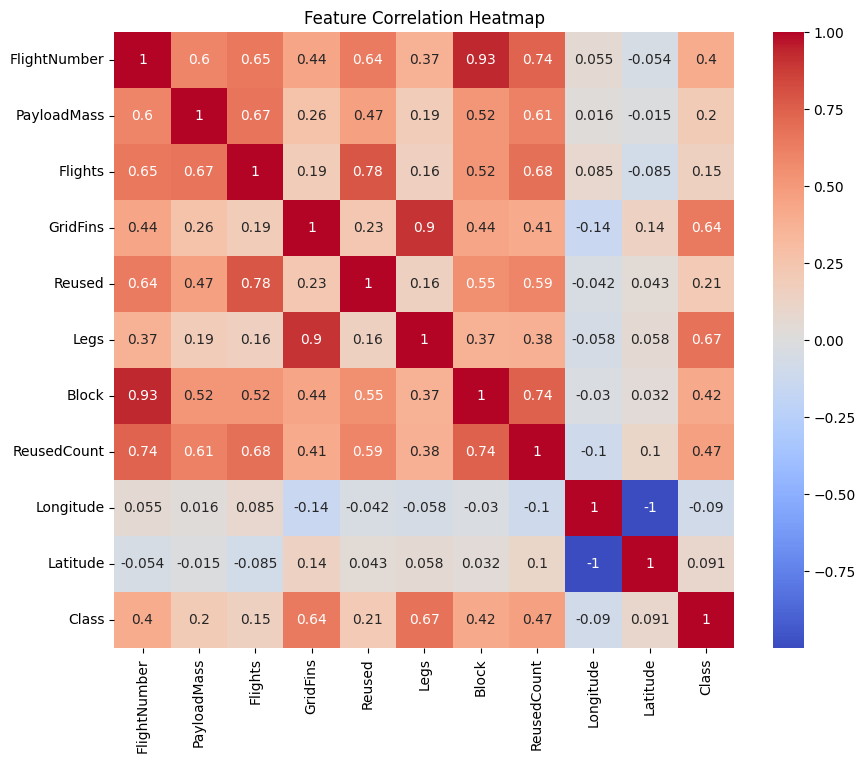

In [ ]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

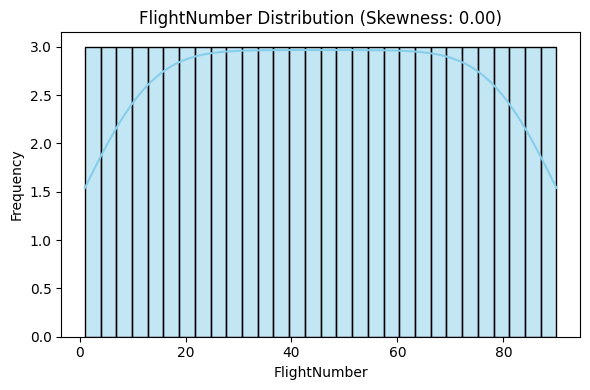

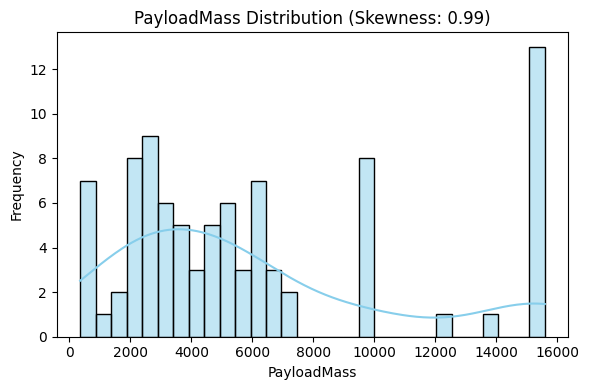

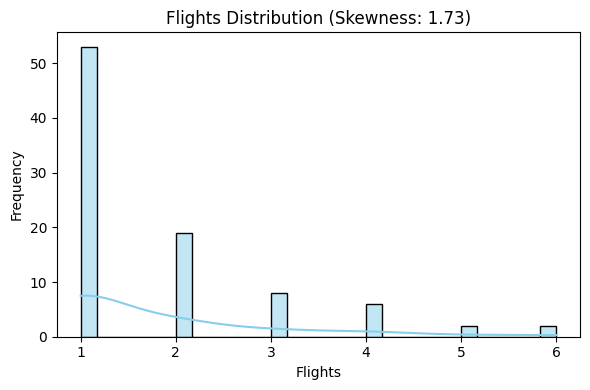

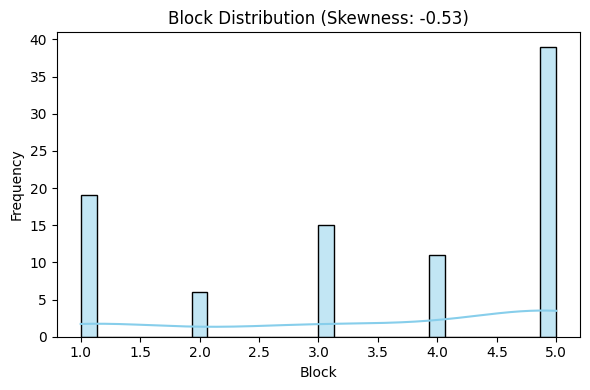

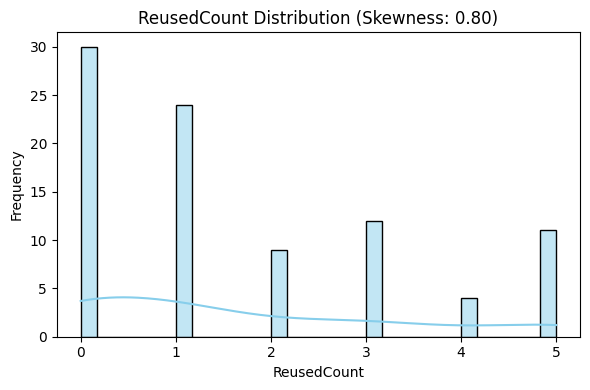

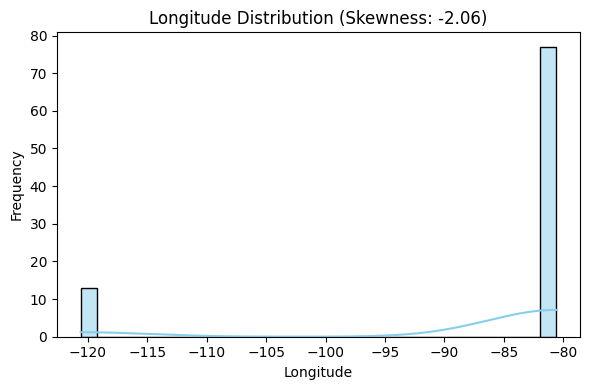

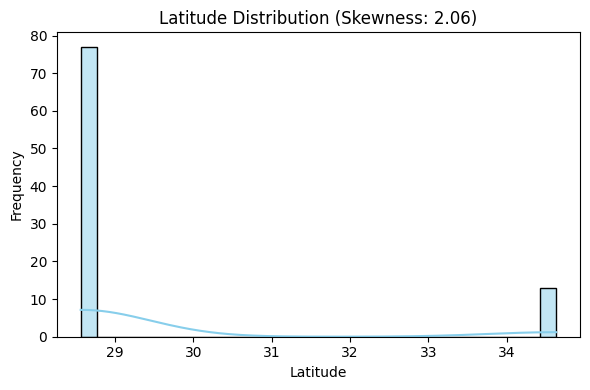

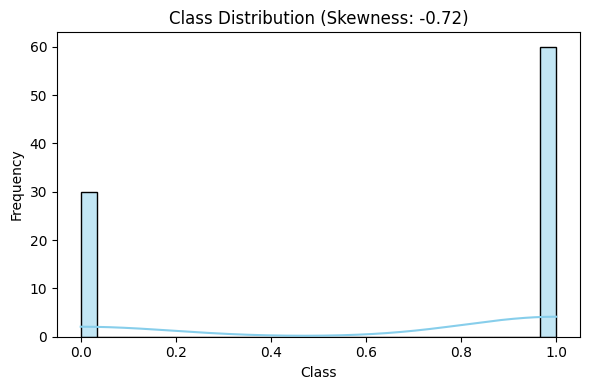

In [ ]:
# Plot histograms and check skewness
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    skew_val = df[col].skew()
    plt.title(f"{col} Distribution (Skewness: {skew_val:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [ ]:
# Outlier summary using IQR method
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Outlier counts per numeric feature:")
print(outlier_summary)


Outlier counts per numeric feature:
{'FlightNumber': 0, 'PayloadMass': 0, 'Flights': 10, 'Block': 0, 'ReusedCount': 0, 'Longitude': 13, 'Latitude': 13, 'Class': 0}


In [ ]:
# Outlier summary using IQR method
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Outlier counts per numeric feature:")
print(outlier_summary)


Outlier counts per numeric feature:
{'FlightNumber': 0, 'PayloadMass': 0, 'Flights': 10, 'Block': 0, 'ReusedCount': 0, 'Longitude': 13, 'Latitude': 13, 'Class': 0}


Visualize the relationship between Flight Number and Payload Mass

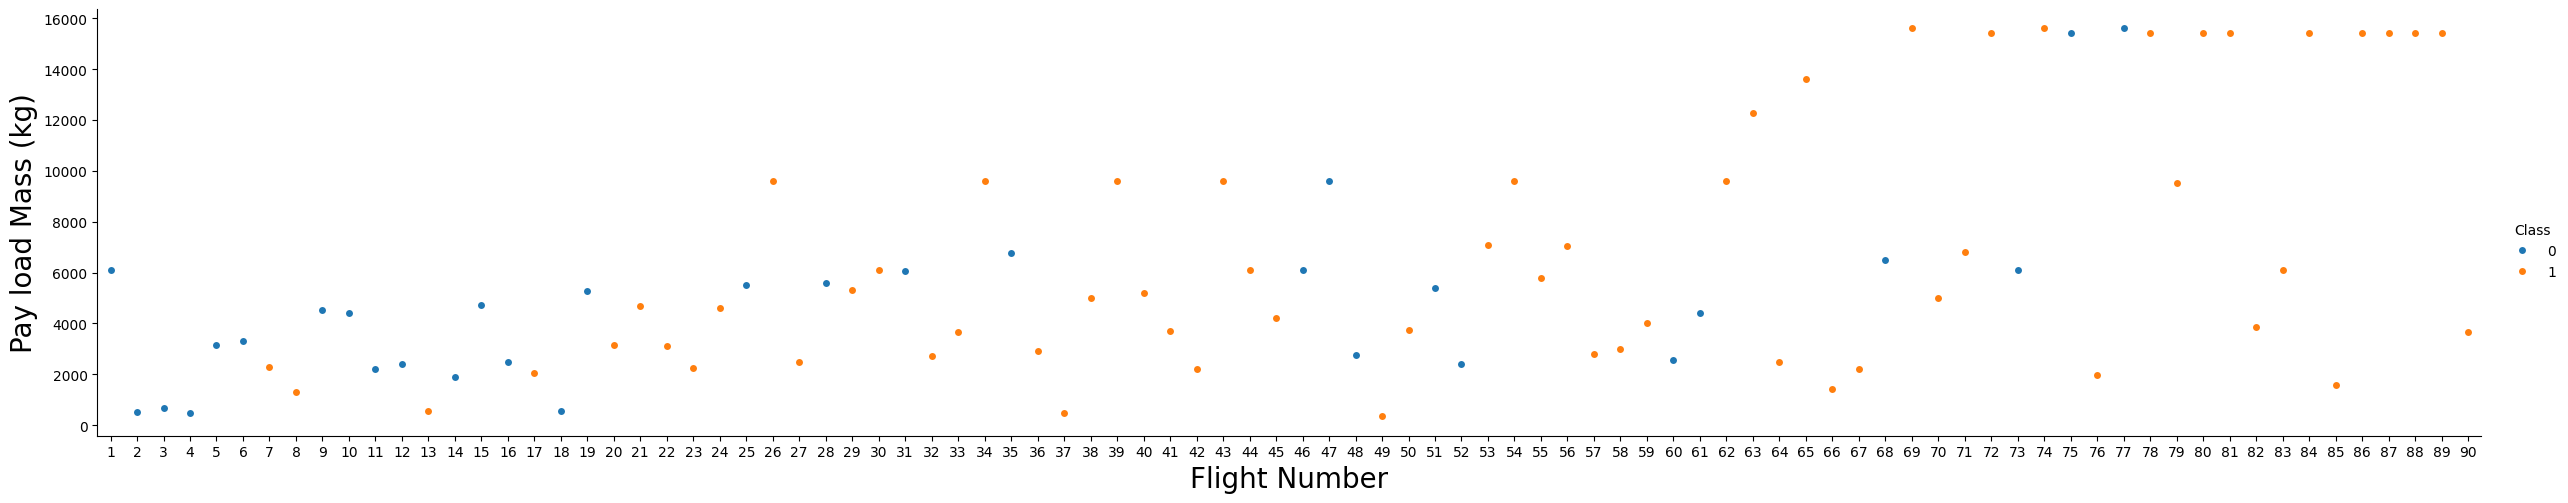

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Visualize the relationship between Flight Number and Launch Site


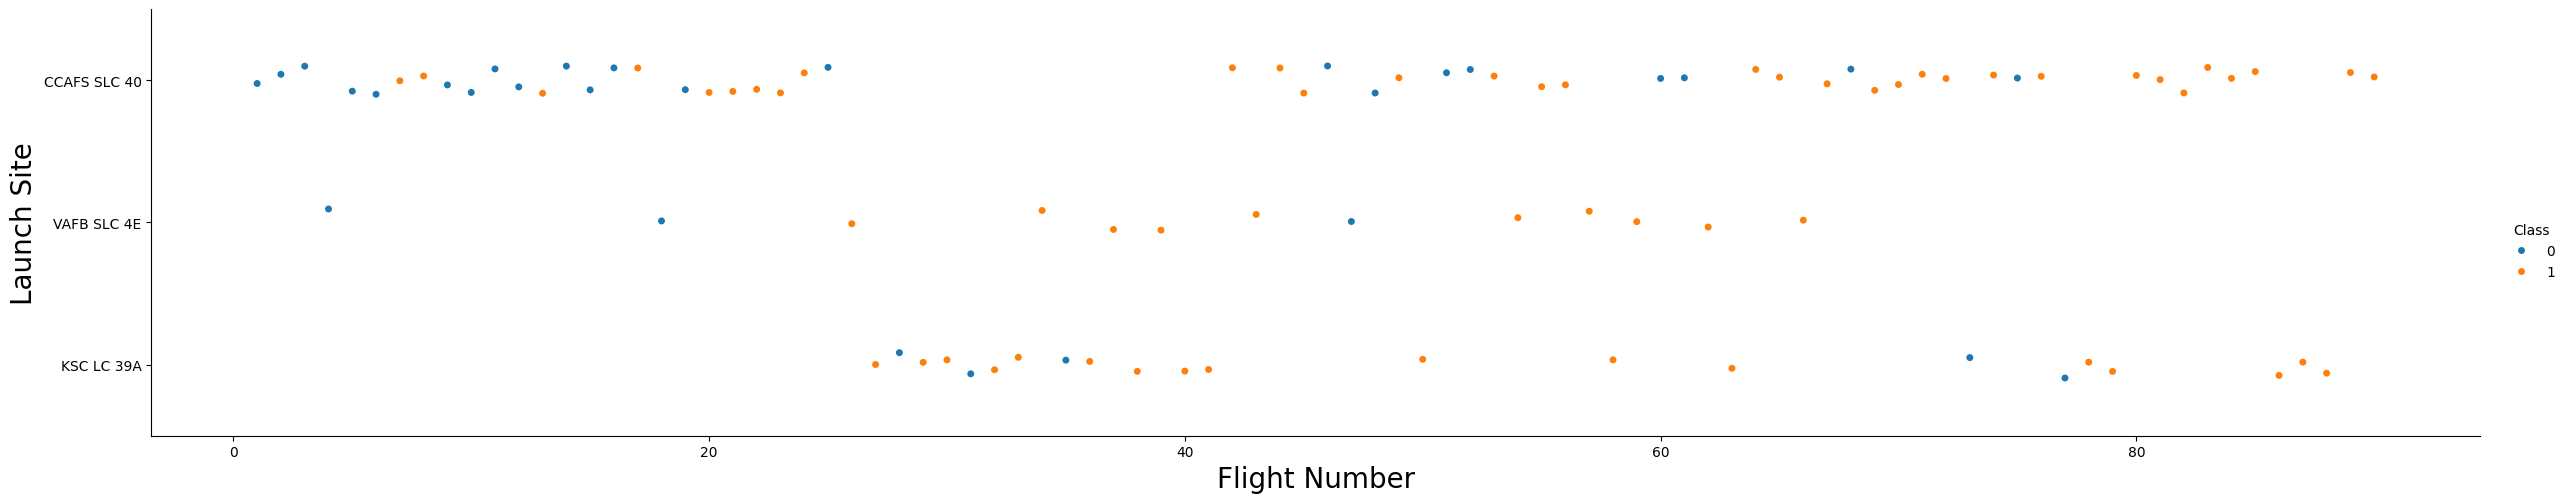

In [ ]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Visualize the relationship between Payload and Launch Site


Text(31.078941666666665, 0.5, 'Pay load Mass (kg)')

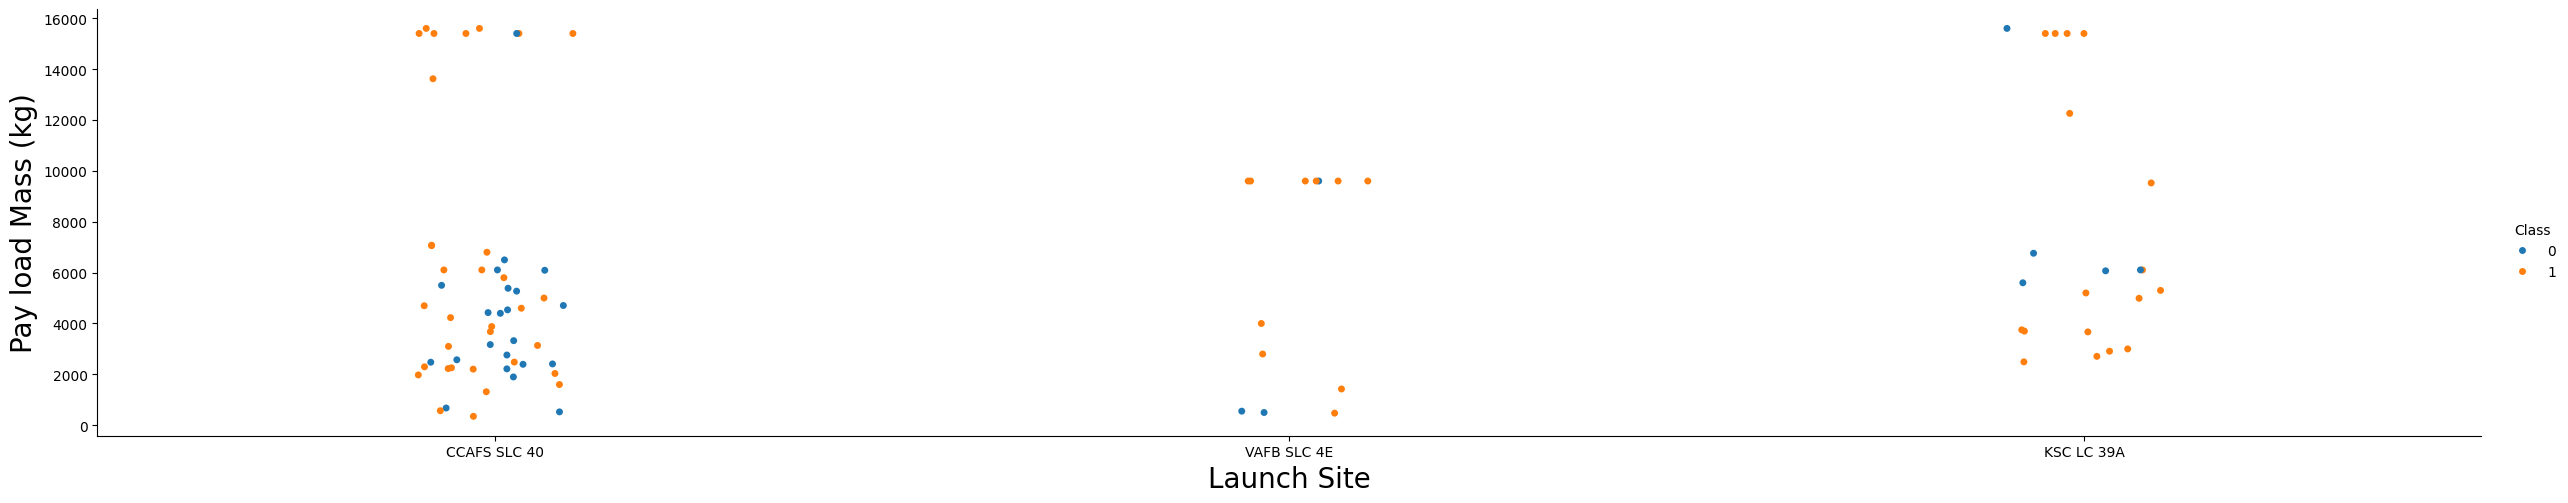

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

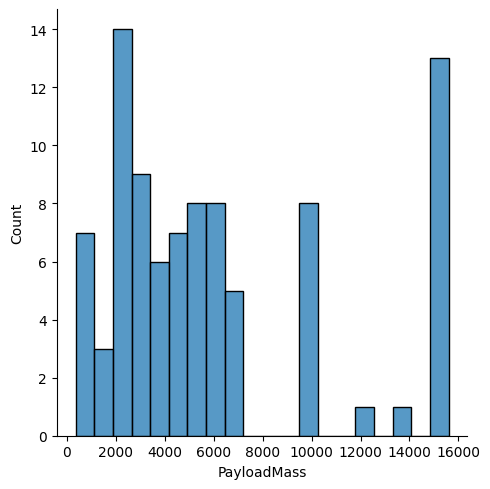

In [ ]:
sns.displot(df['PayloadMass'],bins=20)

<Axes: xlabel='LaunchSite', ylabel='count'>

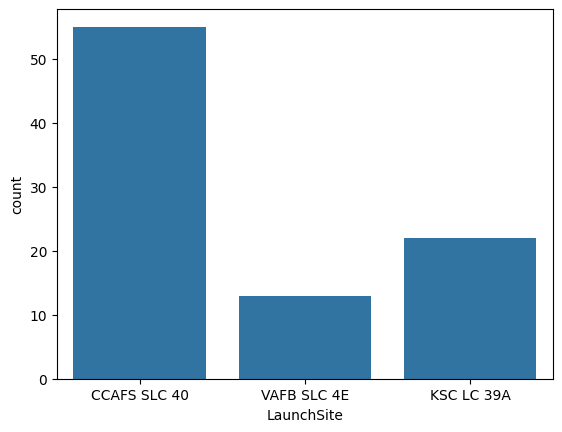

In [ ]:
sns.countplot(x='LaunchSite',data=df)

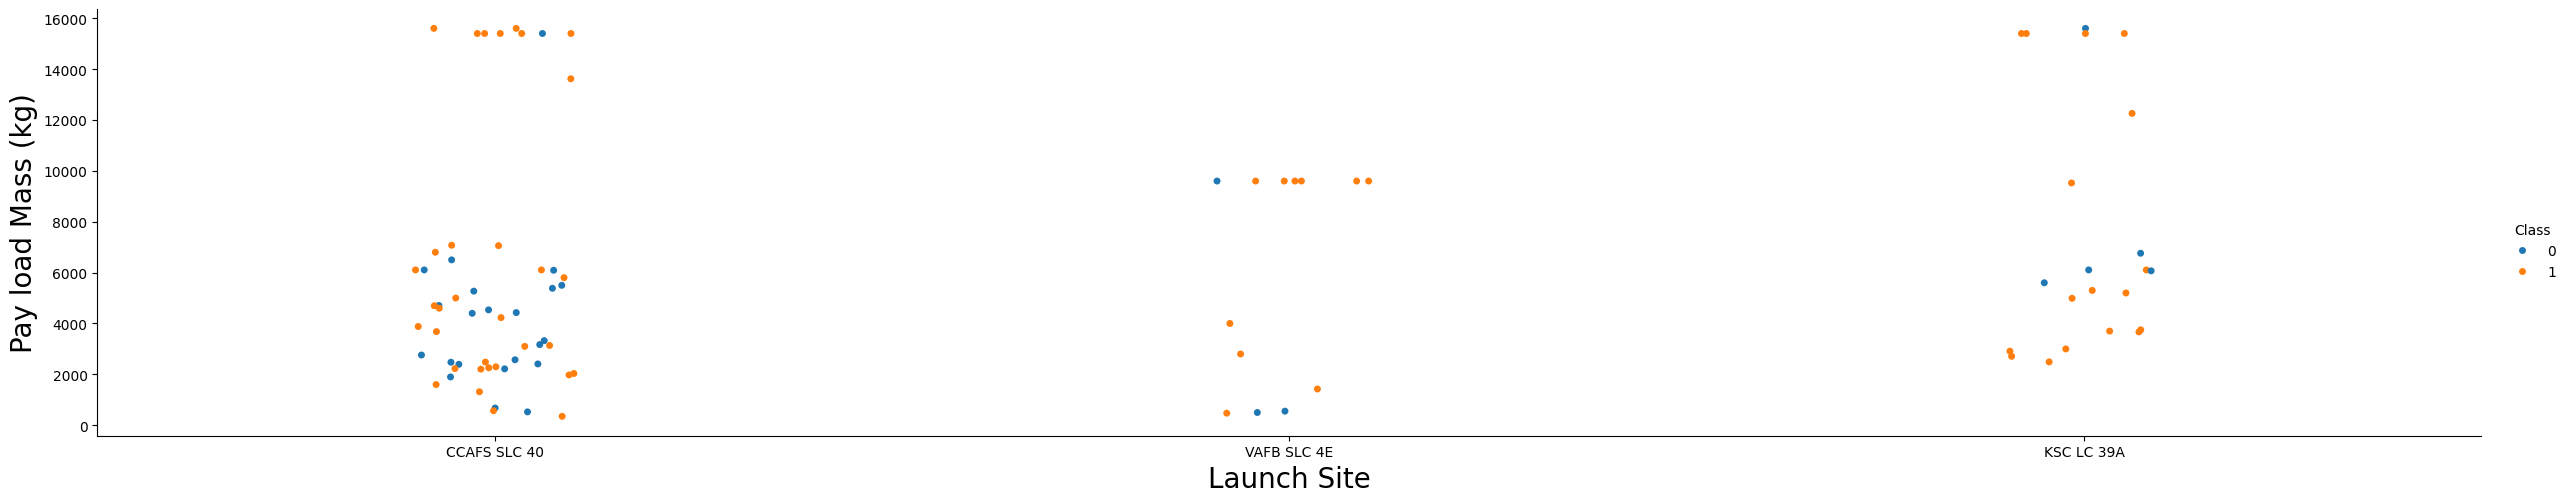

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [ ]:
import seaborn as sns


In [ ]:
df_missing=pd.read_excel('missing_dataset_falcon9.xlsx')

In [ ]:
df_missing

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,NaN,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,NaN,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5,2,B1060,-80.577366,28.561857,1


In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [ ]:
df_missing.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,9
Orbit,0
LaunchSite,4
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
# df_missing['PayloadMass']= df_missing['PayloadMass'].replace(np.nan,df_missing['PayloadMass'].mean)

In [ ]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [ ]:
df_missing['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,53
KSC LC 39A,20
VAFB SLC 4E,13


In [ ]:
df_missing=df_missing['LaunchSite'].replace(np.nan,'CCAFS SLC 40')

In [ ]:
df_missing.info()

<class 'pandas.core.series.Series'>
RangeIndex: 90 entries, 0 to 89
Series name: LaunchSite
Non-Null Count  Dtype 
--------------  ----- 
90 non-null     object
dtypes: object(1)
memory usage: 848.0+ bytes


In [ ]:
df_row=df_missing.dropna(axis=0)
df_row.info()

<class 'pandas.core.series.Series'>
Index: 90 entries, 0 to 89
Series name: LaunchSite
Non-Null Count  Dtype 
--------------  ----- 
90 non-null     object
dtypes: object(1)
memory usage: 1.4+ KB


In [ ]:
# df_col=df_missing.dropna(axis=1)
# df_col.info()

In [ ]:
# payload_mean=df_missing['PayloadMass'].mean()
# payload_mean

# **Preprocessing**

In [ ]:
df=pd.read_csv('dataset_falcon9.csv')


array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'PayloadMass'}>,
        <Axes: title={'center': 'Flights'}>],
       [<Axes: title={'center': 'Block'}>,
        <Axes: title={'center': 'ReusedCount'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

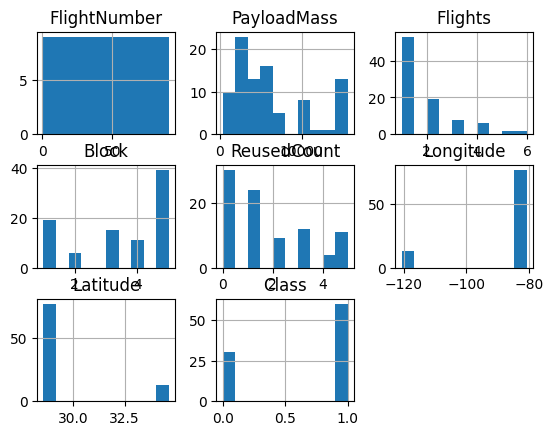

In [ ]:
df.hist()

In [ ]:
df['BoosterVersion']

,BoosterVersion
0,Falcon 9
1,Falcon 9
2,Falcon 9
3,Falcon 9
4,Falcon 9
...,...
85,Falcon 9
86,Falcon 9
87,Falcon 9
88,Falcon 9


In [ ]:
# df['BoosterVersion'].dtype(int)


TypeError: 'numpy.dtypes.ObjectDType' object is not callable

In [ ]:
set(df['BoosterVersion'])


{'Falcon 9'}

In [ ]:
df['PayloadMass']


,PayloadMass
0,6104.959412
1,525.000000
2,677.000000
3,500.000000
4,3170.000000
...,...
85,15400.000000
86,15400.000000
87,15400.000000
88,15400.000000


In [ ]:
df['PayloadMass'].min()


350.0

In [ ]:
df['PayloadMass'].max()


15600.0


# **Machine Learning**





## **Logestic ligression**

In [ ]:
! pip install scikit-Learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train = df.drop(columns='Class', axis=1)
Y_train = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=101)

**Train the model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()


In [ ]:

!pip install pandas scikit-learn

In [ ]:
####

In [ ]:
# predictions = logmodel.predict(x_test)


## **k** nearest

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('preprocessed_dataset.csv')


In [ ]:
df.head()


,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exploratory Data Analysis


In [ ]:
df.info()
X=df.drop('Class',axis=1)
y=df['Class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.20,
                                                    random_state=101)

In [ ]:
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)


In [ ]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = knn.predict(X_test)


In [ ]:
predictions


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test


,Class
50,0
6,1
51,0
54,1
53,1
69,1
32,1
31,1
21,1
88,1


Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test,predictions)


array([[2, 5],
       [3, 8]])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,predictions, normalize=False)


10.0

In [ ]:
accuracy_score(y_test,predictions, normalize=True)


0.5555555555555556

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.62      0.73      0.67        11

    accuracy                           0.56        18
   macro avg       0.51      0.51      0.50        18
weighted avg       0.53      0.56      0.54        18



Grid Search!


In [ ]:
knn_1 = KNeighborsClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
knn_cv = GridSearchCV(knn_1, parameters)
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)


tuned hpyerparameters :(best parameters)  {'n_neighbors': 9}


In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=9)


In [ ]:
knn_1.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
predictions_1 = knn_1.predict(X_test)


In [ ]:
confusion_matrix(y_test,predictions_1)


array([[2, 5],
       [2, 9]])

In [ ]:
accuracy_score(y_test,predictions_1, normalize=False)


11.0

In [ ]:
accuracy_score(y_test,predictions_1, normalize=True)


0.6111111111111112

## New Section

# Decision Trees and Random Forest


In [ ]:
df = pd.read_csv('preprocessed_dataset.csv')


In [ ]:
df.head()


,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,6104.959412,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,677.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,500.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3170.000000,1,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     int64  
 3   GridFins                             90 non-null     int64  
 4   Reused                               90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     int64  
 8   Class                                90 non-null     int64  
 9   Orbit_ES-L1                          90 non-null     int64  
 10  Orbit_GEO                            90 non-null     int64  
 11  Orbit_GTO                         

Define X , y

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']

Building a Decision tree Model


Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.3,
                                                    random_state=101)

Training and Predicting


In [ ]:
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()


In [ ]:
tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
predictions = tree.predict(X_test)


In [ ]:
predictions


array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1])

In [ ]:
y_test


,Class
50,0
6,1
51,0
54,1
53,1
69,1
32,1
31,1
21,1
88,1


Evaluation


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test,predictions)


array([[ 9,  2],
       [ 1, 15]])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,predictions, normalize=False)


24.0

In [ ]:
accuracy_score(y_test,predictions, normalize=True)


0.8888888888888888

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.88      0.94      0.91        16

    accuracy                           0.89        27
   macro avg       0.89      0.88      0.88        27
weighted avg       0.89      0.89      0.89        27



Grid Search for Decision Tree!


In [ ]:
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_1 = DecisionTreeClassifier()


In [ ]:
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5]}

In [ ]:
tree_cv = GridSearchCV(tree_1, parameters)
tree_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)


tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
tree_1 = DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split= 5)


In [ ]:
tree_1.fit(X_train,y_train)


DecisionTreeClassifier(min_samples_split=5)

In [ ]:
predictions_1 = tree_1.predict(X_test)


In [ ]:
confusion_matrix(y_test,predictions_1)


array([[ 9,  2],
       [ 1, 15]])

In [ ]:
accuracy_score(y_test,predictions_1, normalize=False)


24.0

In [ ]:
accuracy_score(y_test,predictions_1, normalize=True)


0.8888888888888888

Building a Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,rfc_pred))


[[ 8  3]
 [ 2 14]]


In [ ]:
accuracy_score(y_test,predictions, normalize=False)


24.0

In [ ]:
accuracy_score(y_test,predictions, normalize=True)


0.8888888888888888

In [ ]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.82      0.88      0.85        16

    accuracy                           0.81        27
   macro avg       0.81      0.80      0.81        27
weighted avg       0.81      0.81      0.81        27



In [ ]:
# Grid Search for Random Forest!


In [ ]:
rfc_1 = RandomForestClassifier()


In [ ]:
parameters = {'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],  'n_estimators': [10,20,30] }

In [ ]:
rfc_cv = GridSearchCV(rfc_1, parameters)
rfc_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)


tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [ ]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)


tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [ ]:
rfc_1 = RandomForestClassifier( n_estimators= 10, min_samples_leaf= 1, min_samples_split= 2)


In [ ]:
rfc_1.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
predictions_1 = rfc_1.predict(X_test)


In [ ]:
confusion_matrix(y_test,predictions_1)


array([[ 9,  2],
       [ 2, 14]])

In [ ]:
accuracy_score(y_test,predictions_1, normalize=False)


23.0

In [ ]:
accuracy_score(y_test,predictions_1, normalize=True)


0.8518518518518519